In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Cleaning

In [10]:
df_copy=df.copy(deep=True)

In [11]:
df_copy.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df_copy.drop("CustomerID",axis=1,inplace=True)
df_copy.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Data Visualization

Text(0, 0.5, 'Count')

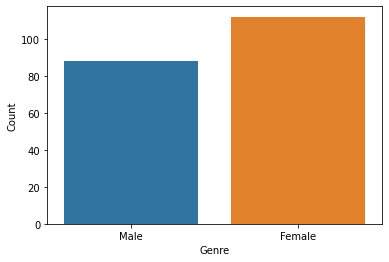

In [13]:
sns.countplot(x='Genre',data=df_copy)
plt.xlabel('Genre')
plt.ylabel('Count')

There are more female customers

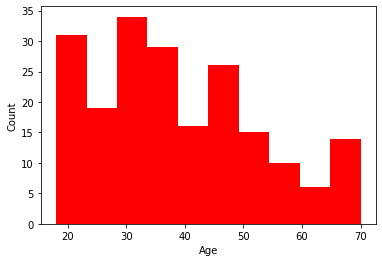

In [14]:
plt.hist(x=df_copy['Age'],bins=10,orientation='vertical',color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Three age group that frquently shop at mall, 15-20,30-40,45-50

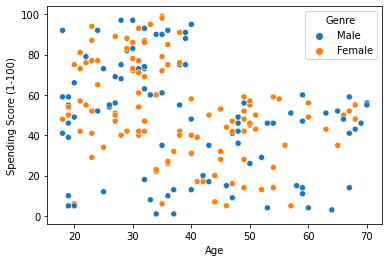

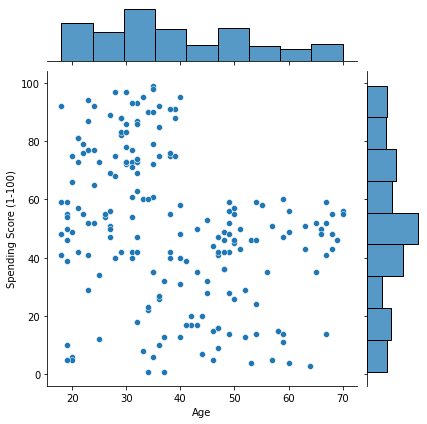

In [15]:
#age vs spending
sns.scatterplot(data=df_copy,x='Age',y='Spending Score (1-100)',hue='Genre')
sns.jointplot(data=df_copy,x='Age',y='Spending Score (1-100)')

Customers of age group 30-40 spending score is high.

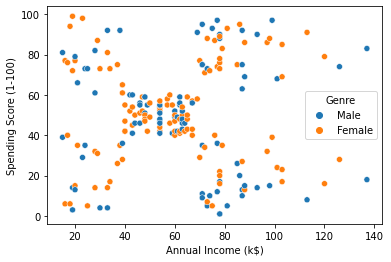

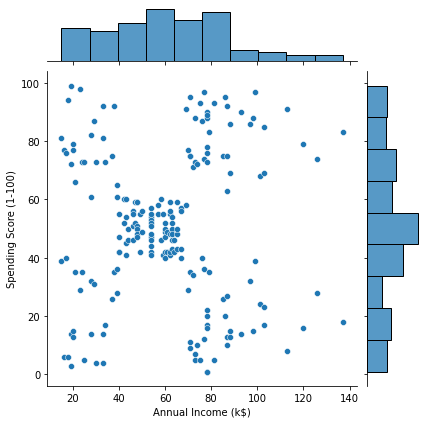

In [16]:
sns.scatterplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
sns.jointplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)')

a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

# Data Preproceesing

In [17]:
X=df_copy.iloc[:,[2,3]]

In [18]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Finding number of clusters

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

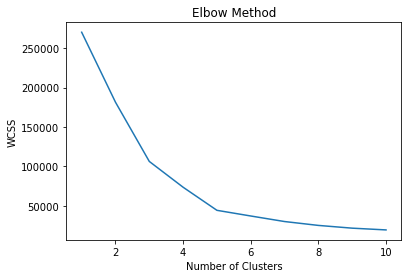

In [20]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

it is observed that 5 clusters are optimal for the given dataset.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values

# Model Building

In [22]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

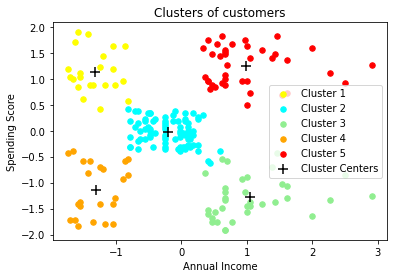

In [24]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Clustering - Observation**

a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 4) - Don't target these customers since they have less income and need to save money.

In [25]:
from sklearn.cluster import AffinityPropagation, Birch, SpectralClustering

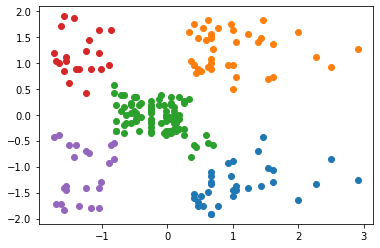

In [26]:
# define the model
model = Birch(threshold=0.01, n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

D:\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


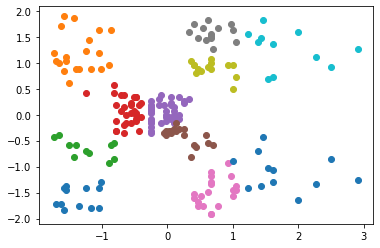

In [27]:
# define the model
model = AffinityPropagation(damping=0.5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

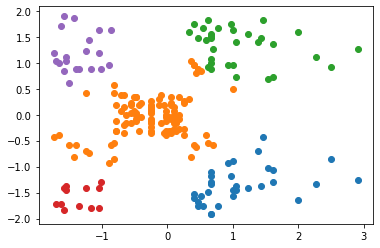

In [28]:
# define the model
model = SpectralClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()


**The algorithms which gives best results are  Birch and KMeans**.